## Chapter 3: Derivatives and Automatic Differentiation

# 3.5 Higher order derivatives

In previous Sections we have seen how we can compute formula for the derivative of a generic function constructed out of elementary functions and operations, and that this derivative too is a generic function constructed out of elementary functions / operations. Because the derivative is a generic function it is natural to ask - what happens if we take *its* derivative?  By the same logic and rules, we should be able to compute it in a similar manner, and for the same reasons it too should be a generic function with known equation.  In turn we should then be able to compute the derivative of this formula, and so on ad infinitum.  

These 'derivatives of derivatives' are referred to commonly as *higher order derivatives*, and are the subject of this Section.

In [1]:
# This code cell will not be shown in the HTML version of this notebook
#imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calclib

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## 3.5.1 Higher order derivatives by example

Lets explore the concept of higher order derivatives by first looking at a few examples.  

#### <span style="color:#a50e3e;">Example 1. </span> Higher order derivatives of $g(w) = w^4$

Right away we can use the power rule here to write out the first derivative as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 4\cdot w^3
\end{equation}

But of course the derivate here is just another monomial - and we can compute its derivative just as easily as we did $g(w)$ to begin with.  With the understanding that $\frac{\mathrm{d}}{\mathrm{d}w}g(w)$ is a function with known equation given above, we can compute the second derivative just as easily 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right) = 3\cdot4\cdot w^2
\end{equation}

And we can of course take the derivative of this as well using the same rules, doing so we get

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right) = 2\cdot3\cdot4\cdot w
\end{equation}

which is the *third derivative*.  One more time?  Using the same derivative rules we can compute the *fourth derivative* here which is 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right)\right) = 1\cdot2\cdot3\cdot4
\end{equation}

In the next Python cell we plot the original function, along with its first three derivatives.

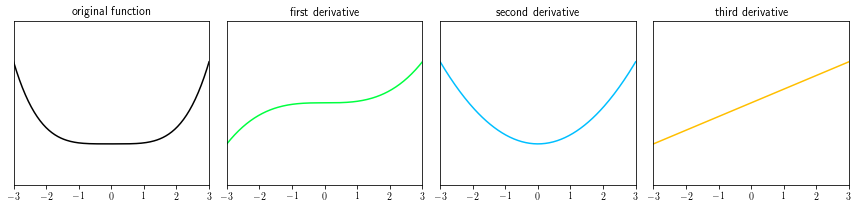

In [2]:
# what function should we play with?  Defined in the next line.
g = lambda w: w**4

# create an instance of the visualizer with this function 
der_viz = calclib.display_derivative_functions.visualizer(g = g)

# run the visualizer for our chosen input function
der_viz.draw_it()

#### <span style="color:#a50e3e;">Example 2. </span> Higher order derivatives of $g(w)=\text{cos}(3w) + w^2 + w^3$

Using the derivative formulae and rules from the previous Section as well as the compact higher order derivative notation introduced in the previous example, we can write out the first three derivatives explicitly as 


\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = -3\text{sin}(3w) + 2w + 3w^2\\
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right) = -9\text{cos}(3w) + 2 + 6w\\
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right) = 27\text{sin}(3w) + 6\\
\end{array}


We plot these derivatives - along with the original function - in the next Python cell.

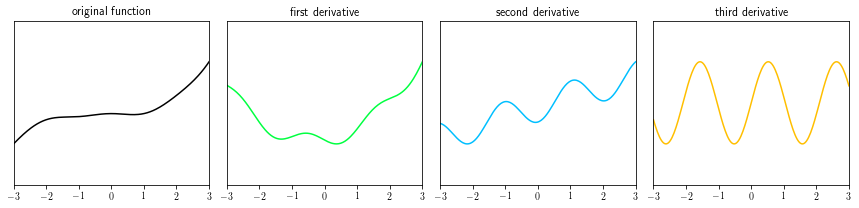

In [3]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.cos(3*w) + w**2 + w**3

# create an instance of the visualizer with this function 
der_viz = calclib.display_derivative_functions.visualizer(g = g)

# run the visualizer for our chosen input function
der_viz.draw_it()

---

### Notation for higher order derivatives

Higher order derivatives are also often expressed using more compact notation than given above.  For example, the second derivative is very often denoted more compactly using the following notation

\begin{equation}
\frac{\mathrm{d^2}}{\mathrm{d}w^2}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)
\end{equation}

Likewise the third derivative is often denoted more compactly as 

\begin{equation}
\frac{\mathrm{d^3}}{\mathrm{d}w^3}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right)
\end{equation}

and in general the $n^{th}$ order derivative is written as

\begin{equation}
\frac{\mathrm{d^n}}{\mathrm{d}w^n}g(w) 
\end{equation}

> Compact notation for the derivative of order $n$: $\frac{\mathrm{d^n}}{\mathrm{d}w^n}g(w) $

## 3.5.2 The recursive nature of higher order derivatives

With the fact that the derivative is a mathematical function in mind, note how this means that higher order derivatives are *compositions of the derivative function with itself*.  For example, the second derivative

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(g(w)\right)\right)
\end{equation}

is a composition of the derivative $\frac{\mathrm{d}}{\mathrm{d}w}(\cdot)$ with itself.  Likewise the third order derivative is the composition of the derivative with itself two times, and in general an $n^{th}$ order derivative $\frac{\mathrm{d^n}}{\mathrm{d}w^n}g(w)$ is the composition of the derivative $n-1$ times with itself evaluated at $g(w)$.  We can also write the $n^{th}$ order derivative using parenthesis to highlight the fact that it is a (composition) of functions as $\frac{\mathrm{d^n}}{\mathrm{d}w^n}\left(g(w)\right)$.  This fact has enormous repercussions for the practical computing of derivatives *because function compositions are recursive*, and so can be made into very efficiently subroutines.

> The $n^{th}$ order derivative $\frac{\mathrm{d^n}}{\mathrm{d}w^n}\left(g(w)\right)$ is a composition of the derivative $n-1$ times with itself evaluated at the input $g(w)$.  This fact has enormous repercussions for the practical computing of derivatives *because function compositions are recursive*.

It is not surprising then that the practical computing of order derivatives - being recursive functions - can be then computed recursviely.  We describe how these recursive computations are performed by hand, and then encode these principles in an update Automatic Differentiation framework in the Section following this one. 

## 3.5.4 Computing higher order derivatives via the forward mode

In this short subsection we walk through higher order derivative calculations for a number of simple examples.  As with the first order derivative calculations, these are performed by crawling *forward* through the computation graph of the function, calculating $\frac{\mathrm{d^n}}{\mathrm{d}w^n}$ at each node.  As with the first order calculations, all higher order derivative calculations decompose into a set of small recursive derivative calculations at each children-parent group of nodes, with derivative information flowing from children to parent nodes in such a way that minimal computations are required at each node in the graph.

#### <span style="color:#a50e3e;">Example 3. </span> Calculating higher order derivatives of $g(w)=w^4$ recursively

We first draw out the computation graph for this function, which is very simple.

<p><img src="../../mlrefined_images/calculus_images/onenode_graph.png" width="20%" height="auto"></p>

To compute the first derivative $\frac{\mathrm{d}}{\mathrm{d}w} g(w) = \frac{\mathrm{d}}{\mathrm{d}w} a(w)$ here we apply the power rule, and to compute the derivative of order $n$  $\frac{\mathrm{d}^n}{\mathrm{d}w^n} a(w)$ we *recursively* apply the power rule $n$ times.  For the case $n=3$ we have

\begin{array}
\
\frac{\mathrm{d}^3}{\mathrm{d}w^3} a(w) = \\ \frac{\mathrm{d}^2}{\mathrm{d}w^2} 4\times w^3 = \\
\frac{\mathrm{d}}{\mathrm{d}w} 4\times 3 \times w^2 = \\
 4\times 3 \times 2 w = 24w \\
\end{array}

#### <span style="color:#a50e3e;">Example 4. </span> Higher order derivative calculations of $g(w) = \text{sin}(w^3)$ going  forwards through the computation graph

Lets look at how computation flows on the graph of this function when calculating higher order derivatives.  First, we plot the simple computation graph of this equation.

<p><img src="../../mlrefined_images/calculus_images/higher_order_0.png" width="100%" height="auto"></p>

We begin by looking at how the second order derivative  $\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w) = \frac{\mathrm{d}^2}{\mathrm{d}w^2}b(a)$ is computed on the graph.

Starting at node $a$ we compute the first and second order derivatives with respect to $w$.

<p><img src="../../mlrefined_images/calculus_images/higher_order_1.png" width="100%" height="auto"></p>

Since $a(w) = w^3$ the first and second derivatives are directly given by recursively applying the power rule as 

\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}a(w) = 3\times w^2 \\
\frac{\mathrm{d}^2}{\mathrm{d}w^2}a(w) = 3\times 2 \times w = 6w\\
\end{array}

Moving forward on the graph we are now at node $b$, where we need to again compute the first and second derivatives with respect to $w$. In other words, we need to recursively apply the derivative function to $b(a)$.

<p><img src="../../mlrefined_images/calculus_images/higher_order_2.png" width="100%" height="auto"></p>

As usual with the first derivative we must use the chain rule from Table 2, writing the derivative formally as 

$$
\frac{\mathrm{d}}{\mathrm{d}w}b(a) = \frac{\mathrm{d}}{\mathrm{d}a}b(a)\frac{\mathrm{d}}{\mathrm{d}w}a(w)  \\
$$

To compute the formal value of this derivative we need only use the lookup table to compute $\frac{\mathrm{d}}{\mathrm{d}a}b(a) = \text{cos}(a)=\text{cos}(w^3)$, and since we have already computed $\frac{\mathrm{d}}{\mathrm{d}w}a(w)$ we have

$$
\frac{\mathrm{d}}{\mathrm{d}w}b(a) = 3\text{cos}(w^3)w^2
$$

Now, notice that taking the second derivative means taking the derivative of a *product of two functions of $w$*, i.e., $\frac{\mathrm{d}}{\mathrm{d}a}b(a)$ and $\frac{\mathrm{d}}{\mathrm{d}w}a(w)$ and so we must use the product rule.  Writing out the derivative using the product rule we have

$$
\frac{\mathrm{d}^2}{\mathrm{d}w^2}b(a) = \frac{\mathrm{d}}{\mathrm{d}a}b(a)\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}a(w)\right) + \frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}a}b(a)\right)\frac{\mathrm{d}}{\mathrm{d}w}a(w)
$$

However once again we have already computed all but one of the quantities on the right hand side above $\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}a}b(a)\right)$, which to compute we use the chain rule

$$
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}a}b(a)\right) = \frac{\mathrm{d}^2}{\mathrm{d}a^2}b(a)\frac{\mathrm{d}}{\mathrm{d}w}a(w)
$$

Then since we can easily compute $\frac{\mathrm{d}^2}{\mathrm{d}a^2}b(a) = -\text{sin}(a)$ and we already have $\frac{\mathrm{d}}{\mathrm{d}w}a(w) = 3w^2$ together we have $\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}a}b(a)\right) = -\text{sin}(w^3)3w^2$.

With this computation complete we have 

$$
\frac{\mathrm{d}^2}{\mathrm{d}w^2}b(a) =  \text{cos}(w^3)\times 6w -\text{sin}(w^3)3w^2 \times 3w^2
$$

## 3.5.5  Automatic Differentiation of higher order derivative values

The Automatic Differentiation (AD) calculator we built in the previous Section must be slightly adjusted if we are to use it to compute higher order derivatives.  First off, we need to adjust the base of our AD calculator - the variable $w$ - because now we need to keep track of more than just two values.  More specifically - as outlined in the hand calculations performed in the previous Subsection - if we are to compute the derivative of order $R$ we need to keep track of both the function and derivative value of every order up and equal to $R$.  We will do this by beginning with the same ``MyTuple`` object for representing $w$ - which holds its value and value of its derivative - and then we will recurse on this definition to create all of the necessary place-holders for higher order function / derivative values.

In [4]:
class MyTuple:
    '''
    The basic object representing the input variable 'w'
    represents the core of our AD calculator.  An instance 
    of this class is a tuple containining one function/derivative
    evaluation of the variable 'w'.  Because it is meant to 
    represent the simple variable 'w' the derivative 'der' is
    preset to 1.  The value 'val' can be set to 0 by default.  
    '''
    def __init__(self,**kwargs):
        # variables for the value (val) and derivative (der) of our input function 
        self.val = 0
        self.der = 1    
        
        # re-assign these default values 
        if 'val' in kwargs:
            self.val = kwargs['val']
        if 'der' in kwargs:
            self.der = kwargs['der']   

Below we create a full $R$ length tuple for our base function $w$.  This is a binary tree with $R$ levels, and two values per level.  At the $r^{th}$ level it contains function value and derivative of the $r^{th}$ order derivative.  In other words, when computing the derivative of order $R$ for some input function the object returned by ``` choose_order``` is essentially an array of length $R+1$ with a binary tree-based structure that contains all of the required values.

In [5]:
# make element capable or desired order calculations, will contain the function value as well as every derivative value up to and equal n         
def choose_order(order,**kwargs):
    # initialize first 
    w = MyTuple()
    if 'val' in kwargs:
        w = MyTuple(val = kwargs['val'])
        
    # recurse to create higher order derivative object
    for r in range(order-1):
        w = MyTuple(val = w)
    return(w)   

Next, to build effective recursion for each derivative rule we define the operation rules prior to those for each elementary function. Why?  Because they need not be changed: as defined for the first order calculator the operational rules are naturally recursive.  We repeat these here, adding a few more like negation and subtraction.

In [6]:
# our implementation of the addition rules from Table 2
def multiply(a,b):
    # Create output evaluation and derivative object
    c = MyTuple()

    # switch to determine if a or b is a constant
    if type(a) != MyTuple:
        c.val = a*b.val
        c.der = a*b.der
    elif type(b) != MyTuple:
        c.val = a.val*b
        c.der = a.der*b
    else: # both inputs are MyTuple objects
        c.val = a.val*b.val
        c.der = a.der*b.val + a.val*b.der     # product rule
    
    # Return updated object
    return c

In [7]:
# our implementation of the addition rules from Table 2
def add(a,b):
    # Create output evaluation and derivative object
    c = MyTuple()
    
    # switch to determine if a or b is a constant
    if type(a) != MyTuple:
        c.val = a + b.val
        c.der = b.der
    elif type(b) != MyTuple:
        c.val = a.val + b
        c.der = a.der
    else: # both inputs are MyTuple objects
        c.val = a.val + b.val
        c.der = a.der + b.der
    
    # Return updated object
    return c

In [8]:
# our implementation of the addition rules from Table 2
def subtract(a,b):
    # Create output evaluation and derivative object
    c = MyTuple()
    
    # switch to determine if a or b is a constant
    if type(a) != MyTuple:
        c.val = a - b.val
        c.der = b.der
    elif type(b) != MyTuple:
        c.val = a.val - b
        c.der = a.der
    else: # both inputs are MyTuple objects
        c.val = a.val - b.val
        c.der = a.der - b.der
    
    # Return updated object
    return c

In [9]:
# define negation
def negate(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    b.val = -a.val
    b.der = -a.der
    return b

We then overload these operators in the next cell.

In [10]:
# this next line overloads the addition operator for our MyTuple objects, or in other words adds the 'add' function to our MyTuple class definition on the fly
MyTuple.__add__ = add

# overload the reverse direction so that a + b = b + a
MyTuple.__radd__ = add

# this next line overloads the subtraction operator for our MyTuple objects, or in other words adds the 'add' function to our MyTuple class definition on the fly
MyTuple.__sub__ = subtract

# overload the reverse direction so that a + b = b + a
MyTuple.__rsub__ = subtract

# create two MyTuple objects and try to use Python's built in function assigned to the * operator on them
MyTuple.__mul__ = multiply

# overload the 'reverse multiplication' so that a*b = b*a
MyTuple.__rmul__ = multiply    

# create two MyTuple objects and try to use Python's built in function assigned to the ** operator on them
MyTuple.__neg__ = negate

While the derivative operation rules as employed with the first derivative AD calculator were naturally recursive, not all of those defined previously for the elementary functions were.  Therefore next we describe the small adjustment that needs to be made to each to make them so.

#### <span style="color:#a50e3e;">Example 5. </span> The power rule

Because we have already defined how multiplication treats MyTuple objects, the power rule as defined previously

In [11]:
# our implementation of the power rule from Table 1 
def power(a,n):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value - once '**' is overloaded this line will be recursive for MyTuple objects
    b.val = a.val**n

    # Produce new derivative value - once '**' is overloaded this line will be recursive for MyTuple objects
    b.der = n*(a.val**(n-1))*a.der
    
    # Return updated object
    return b

can be used immediately to compute higher order derivatives once we overload the ```**``` operator to make both the function and derivative updates recursive on MyTuple objects

In [12]:
# create two MyTuple objects and try to use Python's built in function assigned to the ** operator on them
MyTuple.__pow__ = power

Now we can compute e.g., the third derivative of $g(w) = w^4$ as in the next Python cell.

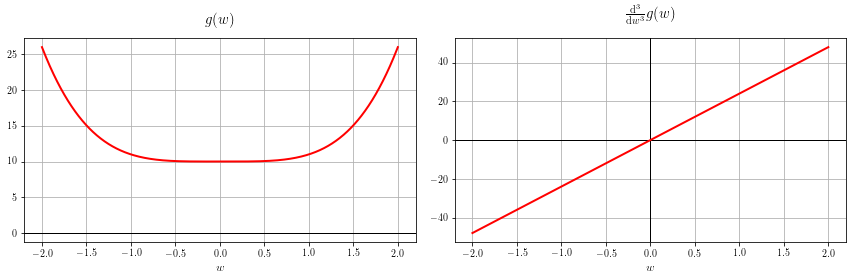

In [13]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: w**4 + 10
w = np.linspace(-2,2,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=3)

#### <span style="color:#a50e3e;">Example 6. </span> Recursive derivative rule for $g(w) = \text{tanh}(w)$

We can easily adjust the tanh derivative rule to define higher order derivatives recursively.  We simply add a branch that re-evaluates the tanh function when the input is not a scalar value.

In [14]:
# our implementation of the power rule from Table 1 
def tanh(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # check if .val is constant, then last derivative to evaluate
    if type(a.val) != MyTuple:        
        # Calculate new current value
        b.val = np.tanh(a.val)

        # Calculate new current derivative value
        b.der = (1 - np.tanh(a.val)**2)*a.der
    else:    # the recursive branch
        # Calculate new current value
        b.val = tanh(a.val)

        # Calculate new current derivative value
        b.der = (1 - tanh(a.val)**2)*a.der
    
    # Return updated object
    return b

With our tanh function defined we can employ it to calculate general order derivatives of a wide range of functions.  For example, lets compute the fourth order derivative of

$$
g(w) = \text{tanh}(w^2)
$$

We do this in the next Python cell.

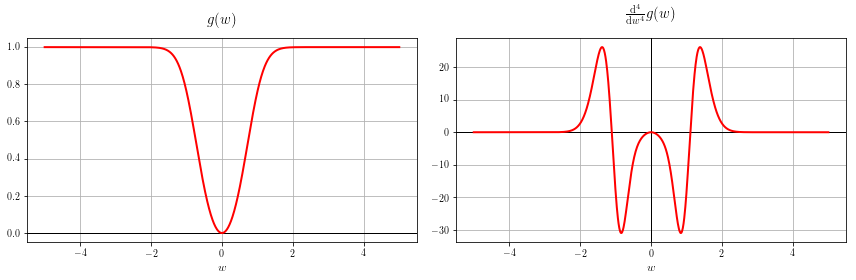

In [15]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: tanh(w**2)
w = np.linspace(-5,5,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=4)

#### <span style="color:#a50e3e;">Example 7. </span> Recursive derivative rule for $g(w) = \text{sin}(w)$

To extend the sinusoid derivative rule we add a switch to the original function we made for the first order calculator.  This routes the derivative recursively when the input to the derivative function is itself a MyTuple object.

In [16]:
# our homemade sine function - made general to accept a function as input (hence the explicit application of the chain rule)
def sin(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # check if .val is constant, then last derivative to evaluate
    if type(a.val) != MyTuple:        
        # Calculate new current value
        b.val = np.sin(a.val)

        # Calculate new current derivative value
        b.der = np.cos(a.val)*a.der
    else:  # the new recursive branch
        # Calculate new current value
        b.val = sin(a.val)

        # Calculate new current derivative value
        b.der = cos(a.val)*a.der

    # Return updated object
    return b

Because the recursive branch here calls for us to push a MyTuple object through cosine, we need to construct this as well.  It essentially mirrors the sine function above, with a recursive branch to deal with MyTuple objects.

In [17]:
# our homemade sine function - made general to accept a function as input (hence the explicit application of the chain rule)
def cos(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # check if .val is constant, then last derivative to evaluate
    if type(a.val) != MyTuple:        
        # Calculate new current value
        b.val = np.cos(a.val)

        # Calculate new current derivative value
        b.der = -np.sin(a.val)*a.der
    else:
        # Calculate new current value
        b.val = cos(a.val)

        # Calculate new current derivative value
        b.der = -sin(a.val)*a.der

    # Return updated object
    return b

We can then put this to work on a simple test case 

$$
g(w) = \text{cos}(w) + 10
$$

and lets compute its fourth derivative.  Using the rules

$$
\frac{\mathrm{d}^4}{\mathrm{d}w^4}g(w) = \text{cos}(w)
$$

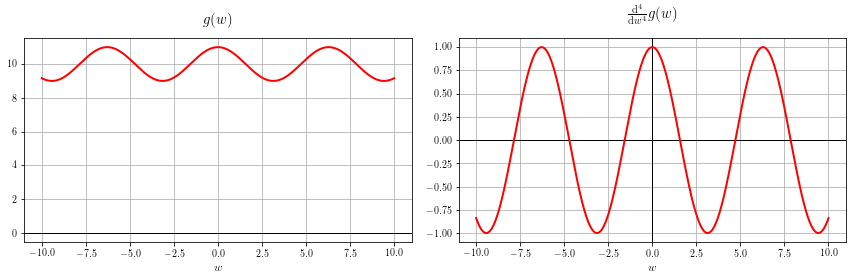

In [18]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: cos(w) + 10
w = np.linspace(-10,10,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=4)

Another example, how about 

$$
g(w) = \text{sin}(w^3)
$$

and we take the $3^{rd}$ derivative of this.

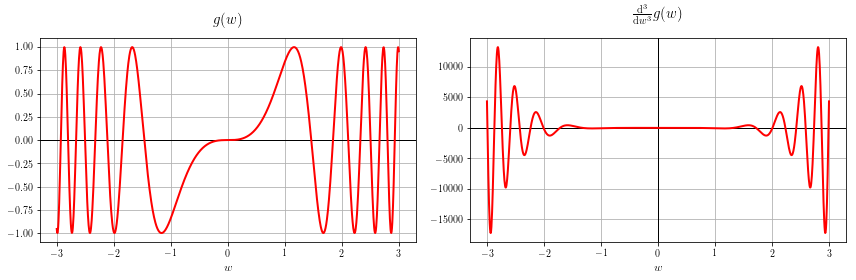

In [19]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: sin(w**3)
w = np.linspace(-3,3,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=3)

Another example, how about 

$$
g(w) = \text{sin}(w^2)\text{tanh}^2(w)\text{cos}(10w) + w
$$

and we take the $2^{nd}$ derivative of this.

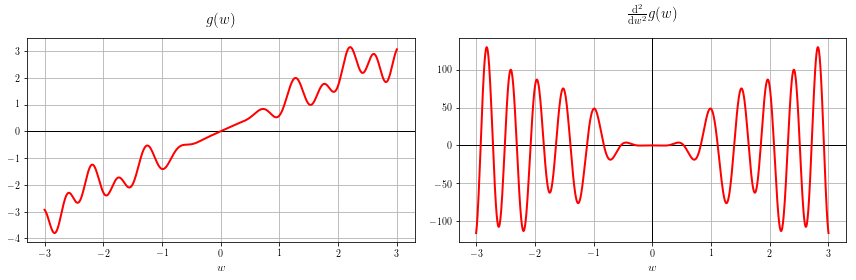

In [20]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: sin(w**2)*tanh(w)**2*cos(10*w) + w
w = np.linspace(-3,3,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=2)

----

In [21]:
g = lambda w: sin(w)

In [ ]:
f = lambda w: g + 

In [ ]:


# make element capable or desired order calculations, will contain the function value as well as every derivative value up to and equal n         
def choose_order(order,**kwargs):
    # initialize first 
    w = MyTuple()
    if 'val' in kwargs:
        w = MyTuple(val = kwargs['val'])
        
    # recurse to create higher order derivative object
    for r in range(order-1):
        w = MyTuple(val = w)
    return(w)   